<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/LSTM_Long_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [9]:
T = 20
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  if x[i1] * x[i2] * x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [10]:
Y.shape

(5000,)

In [11]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 7ms/step - loss: 0.7597 - accuracy: 0.4916 - val_loss: 0.7039 - val_accuracy: 0.4900
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.5156 - val_loss: 0.7000 - val_accuracy: 0.5044
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6965 - accuracy: 0.5032 - val_loss: 0.7027 - val_accuracy: 0.4852
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5116 - val_loss: 0.7014 - val_accuracy: 0.4896
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5044 - val_loss: 0.6974 - val_accuracy: 0.4952
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.5080 - val_loss: 0.7016 - val_accuracy: 0.4808
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5056 - val_loss: 0.7027 - val_accuracy: 0.4880
Epoch 8/100
7

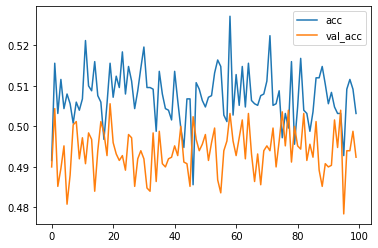

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Simple RNN

inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 28ms/step - loss: 0.7003 - accuracy: 0.4988 - val_loss: 0.7011 - val_accuracy: 0.4928
Epoch 2/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6970 - accuracy: 0.5016 - val_loss: 0.6952 - val_accuracy: 0.4992
Epoch 3/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6949 - accuracy: 0.5048 - val_loss: 0.6952 - val_accuracy: 0.5048
Epoch 4/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6957 - accuracy: 0.4924 - val_loss: 0.6946 - val_accuracy: 0.4968
Epoch 5/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6937 - accuracy: 0.5084 - val_loss: 0.6947 - val_accuracy: 0.4988
Epoch 6/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6934 - accuracy: 0.5188 - val_loss: 0.6948 - val_accuracy: 0.4876
Epoch 7/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 

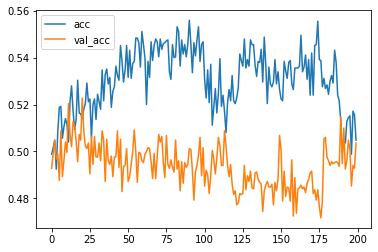

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

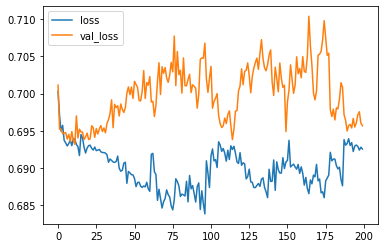

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [16]:
# GRU

inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6953 - accuracy: 0.5012 - val_loss: 0.6954 - val_accuracy: 0.4956
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6943 - accuracy: 0.5068 - val_loss: 0.6930 - val_accuracy: 0.5024
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6928 - val_accuracy: 0.5056
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5028 - val_loss: 0.6926 - val_accuracy: 0.5144
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5188 - val_loss: 0.6934 - val_accuracy: 0.5140
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6941 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4964
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6927 - val_accuracy: 0.5168
Epoch 8/200


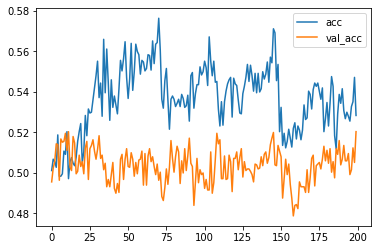

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

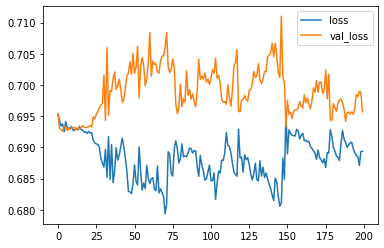

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [22]:
# LSTM

inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=500,
  validation_split=0.5,
)

Epoch 1/500
79/79 [==============================] - 1s 14ms/step - loss: 0.6944 - accuracy: 0.4908 - val_loss: 0.6931 - val_accuracy: 0.5108
Epoch 2/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6942 - accuracy: 0.4932 - val_loss: 0.6931 - val_accuracy: 0.5108
Epoch 3/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 5/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5132
Epoch 6/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: 0.5108
Epoch 7/500
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5196
Epoch 8/500


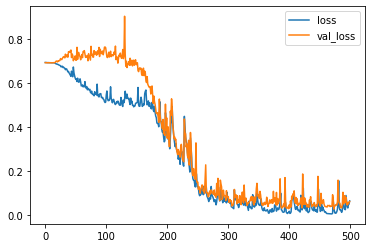

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

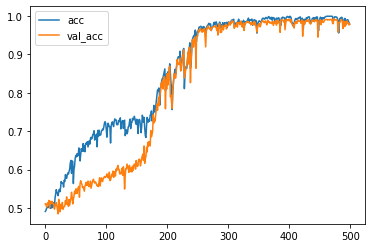

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  if x[i1] * x[i2] * x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [26]:
# LSTM

inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(10, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=500,
  validation_split=0.5,
)

Epoch 1/500
79/79 [==============================] - 1s 16ms/step - loss: 0.6946 - accuracy: 0.4976 - val_loss: 0.6911 - val_accuracy: 0.5328
Epoch 2/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6938 - val_accuracy: 0.4920
Epoch 3/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6947 - accuracy: 0.5168 - val_loss: 0.6911 - val_accuracy: 0.5340
Epoch 4/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6929 - accuracy: 0.5072 - val_loss: 0.6918 - val_accuracy: 0.5264
Epoch 5/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5152 - val_loss: 0.6960 - val_accuracy: 0.4696
Epoch 6/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5168 - val_loss: 0.6931 - val_accuracy: 0.5112
Epoch 7/500
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5172 - val_loss: 0.6920 - val_accuracy: 0.5292
Epoch 

In [27]:
#Global max pooling helps a lot when the  we consdier all the hidden layers. Even with a larger sequence like 30

In [43]:
T = 40
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3, i4):
  if x[i1] * x[i2] * x[i3] * x[i4] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2, 3) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [47]:
# LSTM

inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(10, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

r = model.fit(
  inputs, Y,
  epochs=5000,
  validation_split=0.5,
)

Streaming output truncated to the last 5000 lines.
79/79 [==============================] - 1s 12ms/step - loss: 0.6625 - accuracy: 0.6016 - val_loss: 0.6636 - val_accuracy: 0.6140
Epoch 2502/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6579 - accuracy: 0.6096 - val_loss: 0.6574 - val_accuracy: 0.6164
Epoch 2503/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6545 - accuracy: 0.6200 - val_loss: 0.6558 - val_accuracy: 0.6164
Epoch 2504/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6536 - accuracy: 0.6160 - val_loss: 0.6576 - val_accuracy: 0.6100
Epoch 2505/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6526 - accuracy: 0.6168 - val_loss: 0.6594 - val_accuracy: 0.6172
Epoch 2506/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6576 - accuracy: 0.6104 - val_loss: 0.6532 - val_accuracy: 0.6064
Epoch 2507/5000
79/79 [==============================] - 1s 12ms/step - loss: 0.6611 - ac

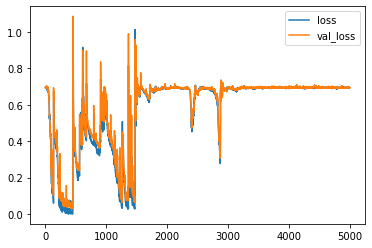

In [48]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

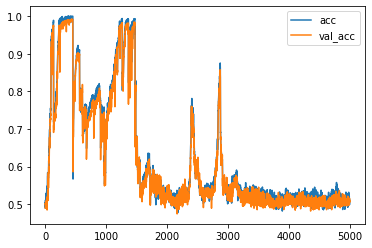

In [49]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()